In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

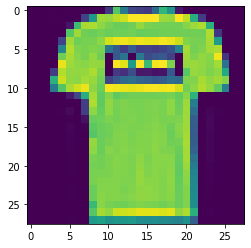

In [4]:
plt.imshow(X_train[1])

In [5]:
X_train[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [6]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)

In [8]:
y_train[:5]


array([9, 0, 0, 3, 0], dtype=uint8)

In [9]:
y_test = y_test.reshape(-1,)

In [10]:
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [11]:
classes = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]


In [12]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

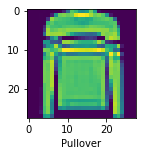

In [14]:
plot_sample(X_train, y_train, 5)


In [15]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [16]:
cnn = models.Sequential([
    layers.Conv2D(filters=20, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2, 2)),
    
    
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

In [17]:
cnn.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [18]:
cnn.fit(X_train,y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4573 - accuracy: 0.8409
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3310 - accuracy: 0.8842
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2983 - accuracy: 0.8956
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2769 - accuracy: 0.9021
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2605 - accuracy: 0.9081
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2454 - accuracy: 0.9126
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2342 - accuracy: 0.9165
Epoch 8/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2233 - accuracy: 0.9201
Epoch 9/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2135 - accuracy: 0.9232
Epoch 10/10
1875/1875 [==============================] - 14s 7ms/step - l

In [19]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2817 - accuracy: 0.9014


[0.28171148896217346, 0.9014000296592712]

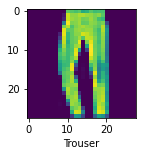

In [20]:
plot_sample(X_test,y_test,5)